In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install keras==1.2.2

     |████████████████████████████████| 175 kB 16.0 MB/s 
     |████████████████████████████████| 2.8 MB 39.4 MB/s 
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209601 sha256=3e6071adb9f25a84c3f3ccc284271218cc7148e35963dbfcf37124420755e0a3
  Stored in directory: /root/.cache/pip/wheels/d1/32/23/2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=7c54fc2df875d2788165104dd45ddd646d58e1d9e932418307da9ad1d7ca91c7
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built keras theano
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [6]:
pip install h5py=='2.9.0'


     |████████████████████████████████| 2.8 MB 30.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires h5py~=3.1.0, but you have h5py 2.9.0 which is incompatible.


In [7]:
pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6 MB 22 kB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 367 kB 39.8 MB/s 
     |████████████████████████████████| 3.2 MB 26.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you 

In [8]:
import h5py
import glob
import numpy as np
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
plt.ion()

path = "/content/drive/MyDrive/CS274P/data"

camfiles = sorted(glob.glob(path + "/camera/*.h5"))
logfiles = sorted(glob.glob(path + "/log/*.h5"))

In [9]:
camfiles

['/content/drive/MyDrive/CS274P/data/camera/2016-01-30--11-24-51-008.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-01-30--13-46-00-009.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-01-31--19-19-25-001.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-02--10-16-58-007.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-08--14-56-28-004.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-02-11--21-32-47-011.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-03-29--10-50-20-010.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-04-21--14-48-08-003.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-05-12--22-20-00-006.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-06-02--21-39-29-005.h5',
 '/content/drive/MyDrive/CS274P/data/camera/2016-06-08--11-46-01-002.h5']

In [10]:
logfiles

['/content/drive/MyDrive/CS274P/data/log/2016-01-30--11-24-51.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-01-30--13-46-00.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-01-31--19-19-25.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-02-02--10-16-58.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-02-08--14-56-28.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-02-11--21-32-47.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-03-29--10-50-20.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-04-21--14-48-08.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-05-12--22-20-00.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-06-02--21-39-29.h5',
 '/content/drive/MyDrive/CS274P/data/log/2016-06-08--11-46-01.h5']

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [12]:
model = VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 8s 0us/step


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [14]:
cams = h5py.File(camfiles[0], 'r')[('X')]

In [15]:
cams[0][0]

array([[21, 22, 21, ..., 23, 21, 22],
       [22, 22, 21, ..., 24, 23, 23],
       [23, 21, 21, ..., 22, 24, 23],
       ...,
       [20, 22, 22, ..., 21, 21, 23],
       [22, 22, 21, ..., 22, 20, 22],
       [20, 22, 22, ..., 20, 21, 20]], dtype=uint8)

In [16]:
cams[0][0].shape

(160, 320)

In [17]:
transposed = cams[30000].transpose(1,2,0)
transposed.shape

(160, 320, 3)

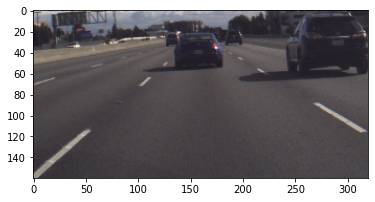

In [18]:
plt.imshow(transposed)
plt.show()

In [19]:
#Do Not Run This
from PIL import Image

img = Image.fromarray(transposed, 'RGB')
img.save('/content/drive/MyDrive/CS274P/data/images/sample.png')

In [20]:
image = load_img('/content/drive/MyDrive/CS274P/data/images/sample.png', target_size = (224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [21]:
y_pred = model.predict(image)

In [22]:
labels = decode_predictions(y_pred, top = 10)
labels

40960/35363 [==================================] - 0s 0us/step


[[('n04487081', 'trolleybus', 0.24004124),
  ('n04461696', 'tow_truck', 0.13262495),
  ('n03417042', 'garbage_truck', 0.10086024),
  ('n04467665', 'trailer_truck', 0.07622157),
  ('n04335435', 'streetcar', 0.04398998),
  ('n06874185', 'traffic_light', 0.04127395),
  ('n02930766', 'cab', 0.032075163),
  ('n03345487', 'fire_engine', 0.03142316),
  ('n03769881', 'minibus', 0.023872431),
  ('n02965783', 'car_mirror', 0.022084719)]]

In [23]:
for i in range(len(labels)):
  print(i)
  print(labels[i])

0
[('n04487081', 'trolleybus', 0.24004124), ('n04461696', 'tow_truck', 0.13262495), ('n03417042', 'garbage_truck', 0.10086024), ('n04467665', 'trailer_truck', 0.07622157), ('n04335435', 'streetcar', 0.04398998), ('n06874185', 'traffic_light', 0.04127395), ('n02930766', 'cab', 0.032075163), ('n03345487', 'fire_engine', 0.03142316), ('n03769881', 'minibus', 0.023872431), ('n02965783', 'car_mirror', 0.022084719)]


In [24]:
for i in range(len(labels)):
  print(i)
  print(labels[i])

0
[('n04487081', 'trolleybus', 0.24004124), ('n04461696', 'tow_truck', 0.13262495), ('n03417042', 'garbage_truck', 0.10086024), ('n04467665', 'trailer_truck', 0.07622157), ('n04335435', 'streetcar', 0.04398998), ('n06874185', 'traffic_light', 0.04127395), ('n02930766', 'cab', 0.032075163), ('n03345487', 'fire_engine', 0.03142316), ('n03769881', 'minibus', 0.023872431), ('n02965783', 'car_mirror', 0.022084719)]


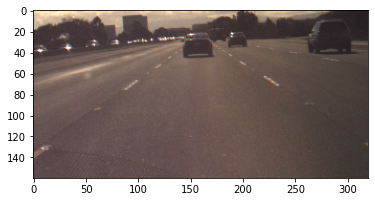

In [25]:
plt.imshow(cams[10066].transpose(1,2,0))
plt.show()

In [26]:
cam_lens = []

for i, val in enumerate(camfiles):
  
  cams = h5py.File(camfiles[i], 'r')[('X')]
  cam_lens.append(len(cams))

In [27]:
cam_lens

[52722, 58993, 19731, 56166, 25865, 85296, 78463, 30538, 51691, 44792, 18177]

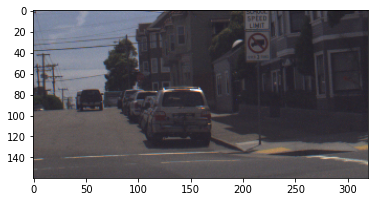

In [28]:
tr = cams[3200].transpose(1,2,0)
plt.imshow(tr)
plt.show()

In [ ]:
#can skip
from PIL import Image

for j in range(5, 11):
  print(str(j) + " Started")
  cams = h5py.File(camfiles[j], 'r')[('X')]
  for i in range(len(cams)):
    img = Image.fromarray(cams[i].transpose(1,2,0), 'RGB')
    img.save('/content/drive/MyDrive/CS274P/data/images/day' + str(j) + '/' + str(i) +'.png')
  print(str(j) + " Done")

In [30]:
import h5py
import glob
import numpy as np
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Embedding, Input, merge, ELU
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils.np_utils import to_categorical
from keras import backend as K
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
plt.ion()

Using TensorFlow backend.


In [32]:
# Custom VGG 16
    
import keras.regularizers
from keras.regularizers import l2, l1

nrows = 224
ncols = 224
wr = 0.00001
dp = 0.

real_in = Input(shape=(2, ), name = "real_input")

frame_in = Input(shape=(3, 64, 64), name = "img_input")

conv1 = Convolution2D(64, 3, 3, border_mode =  "same", W_regularizer = l1(wr), 
                      init = "lecun_uniform", activation = "relu")
conv_l1 = conv1(frame_in)
Econv_l1 = ELU()(conv_l1)
pool_l1 = MaxPooling2D((2,2), border_mode =  "same")(Econv_l1)

conv2 = Convolution2D(128, 3, 3, border_mode =  "same", W_regularizer = l1(wr), 
                      init = "lecun_uniform", activation = "relu")
conv_l2 = conv2(pool_l1)
Econv_l2 = ELU()(conv_l2)
pool_l2 = MaxPooling2D((2,2), border_mode =  "same")(Econv_l2)
drop_l2 = Dropout(dp)(pool_l2)

flat = Flatten()(drop_l2)

M = merge([flat, real_in], mode = "concat", concat_axis = 1)

D1 = Dense(32, W_regularizer = l1(wr), init = "lecun_uniform", activation = "relu")(M)
ED1 = ELU()(D1)
DED1 = Dropout(dp)(ED1)

S1 = Dense(64, W_regularizer = l1(wr), init = "lecun_uniform", activation = "relu")(DED1)
ES1 = ELU()(S1)

Steer_out = Dense(1, activation = "linear", name = "steer_out", init = "lecun_uniform")(ES1)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [33]:
model = Model(input = [real_in, frame_in], output = [Steer_out])
adam = Adam(lr = 0.001)

In [34]:
model.compile(loss = ['mse'], optimizer = adam, metrics = ['mse'])

In [35]:
all_data = np.load("/content/drive/MyDrive/CS274P/data/TrainingData.npz")

In [36]:
images = all_data['images']
speed = np.concatenate((all_data['speed'], all_data['accel']))
speed = speed.reshape((-1,2))
steer = all_data['steer']

In [37]:
nb_epoch = 4
mini_epoch = 2
num_steps = int(nb_epoch/mini_epoch)

for step in tqdm(range(0, num_steps)):
  
  h = model.fit([speed, images], {'steer_out' : steer}, batch_size = 32, 
                nb_epoch = mini_epoch, verbose = 1, validation_split = 0.1, shuffle = True)
  
  val_loss = h.history['val_loss'][-1]
  val_loss = round(val_loss, 8)
  
  model.save_weights('/content/drive/MyDrive/CS274P/data/VGGweights.h5')

  0%|          | 0/2 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.
Train on 470190 samples, validate on 52244 samples
Epoch 1/2
470190/470190 [==============================] - 1233s - loss: 0.2988 - mean_squared_error: 0.2615 - val_loss: 0.0221 - val_mean_squared_error: 0.0026
Epoch 2/2
470190/470190 [==============================] - 1236s - loss: 0.0072 - mean_squared_error: 0.0027 - val_loss: 0.0029 - val_mean_squared_error: 0.0026


 50%|█████     | 1/2 [41:11<41:11, 2471.34s/it]

Train on 470190 samples, validate on 52244 samples
Epoch 1/2
470190/470190 [==============================] - 1233s - loss: 0.0024 - mean_squared_error: 0.0021 - val_loss: 0.0028 - val_mean_squared_error: 0.0026
Epoch 2/2
470190/470190 [==============================] - 1237s - loss: 0.0023 - mean_squared_error: 0.0021 - val_loss: 0.0028 - val_mean_squared_error: 0.0026


100%|██████████| 2/2 [1:22:22<00:00, 2471.11s/it]


In [38]:
model.load_weights('/content/drive/MyDrive/CS274P/data/VGGweights.h5')

In [39]:
def get_point(s, start = 0, end = 63, height = 16):

  X = int(s*(end - start))

  if X < start: X = start

  if X > end: X = end

  return (X, height)

In [40]:
begin = 800
end = 1300
preds = model.predict([speed[begin:end], images[begin:end]])
steer_preds = preds.reshape([-1])

Done


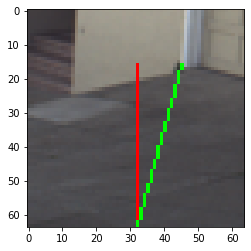

In [41]:
import matplotlib.animation as animation
from PIL import Image, ImageDraw
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

figure = plt.figure()
imageplot = plt.imshow(np.zeros((64, 64, 3), dtype = np.uint8))
val_idx = begin

def next_frame(i):

  im = Image.fromarray(np.array(images[val_idx+i].transpose(1,2,0), dtype = np.uint8))

  p = get_point(steer_preds[i])
  t = get_point(steer[i + val_idx])

  draw = ImageDraw.Draw(im)
  draw.line((32, 63, p, p), fill = (255, 0, 0, 128))
  draw.line((32, 63, t, t), fill = (0, 255, 0, 128))

  imageplot.set_array(im)

  return imageplot
animate = animation.FuncAnimation(figure, next_frame, frames=range(0, len(images[begin:end])), interval=25, blit=False)
print("Done")

In [42]:
animate

Output hidden; open in https://colab.research.google.com to view.

In [43]:
animate.save("/content/drive/MyDrive/CS274P/data/VGG800.mp4")